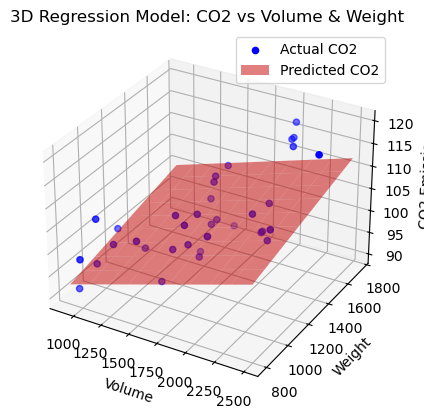

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from warnings import filterwarnings
filterwarnings("ignore")
# Load data
data = pd.read_csv("DATA.csv")

# Independent and dependent variables
x = data[['Volume', 'Weight']]
y = data['CO2']

# Fit the model
model = LinearRegression()
model.fit(x, y)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter actual data points
ax.scatter(data['Volume'], data['Weight'], y, color='blue', label='Actual CO2')

# Create a meshgrid for Volume and Weight
volume_range = np.linspace(data['Volume'].min(), data['Volume'].max(), 10)
weight_range = np.linspace(data['Weight'].min(), data['Weight'].max(), 10)
volume_grid, weight_grid = np.meshgrid(volume_range, weight_range)

# Flatten and predict CO2 for the grid
X_pred = np.c_[volume_grid.ravel(), weight_grid.ravel()]
CO2_pred = model.predict(X_pred).reshape(volume_grid.shape)

# Plot the regression surface
ax.plot_surface(volume_grid, weight_grid, CO2_pred, color='red', alpha=0.5, label='Predicted CO2')


ax.set_xlabel('Volume')
ax.set_ylabel('Weight')
ax.set_zlabel('CO2 Emission')
ax.set_title('3D Regression Model: CO2 vs Volume & Weight')

plt.legend()
plt.show()